## Linear Regression for Diabetes dataset


Import needed libraries

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, metrics
import pandas as pd

- TO-DO:

Load the diabetes dataset, divided into `X` data and `y` features in a Dataframe format:

- Hint: use a prompt for Gemini (inside Google Colab, if you want to keep record of it you need to use it outside via your email account).

**It should look like the following:**



In [7]:
# Print the DataFrame
#print(df)
df

NameError: name 'df' is not defined

In [9]:
#Carga realizada con instrucciones de ChatGPT

diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

Load the diabetes dataset, divided into `X` data and `y` features (as arrays):

In [10]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [11]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [12]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
print(y.shape)
print(y[0])

(442,)
151.0


Select just one feature to target for this exercise

In [14]:
# Selecting the 3rd feature
X = X[:, 2]
print(X.shape)
print(X[0])
X

(442,)
0.061696206518683294


array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [15]:
#Reshaping to get a 2D array
X = X.reshape(-1, 1)
print(X.shape)
print(X)

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 

Split the training and test data for both `X` and `y`

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

Select the model and fit it with the training data

In [17]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use test data to predict a line

In [18]:
y_pred = model.predict(X_test)

In [21]:
error1 = y_test - y_pred
#error2 = y_pred - y_test

#error_abs = abs(y_test - y_pred)
#error_sq = (y_test - y_pred)**2

print(error1)


[-115.51688772  -34.33551626  -56.03044064  -62.68643405   -5.45922041
  100.74580131   33.8458552  -102.17288112  -58.93384235   78.60681644
  -63.68297845  -61.65587259   50.56442985  -27.54399357   40.08980791
   27.24752911   -3.16942552   41.55606032   67.02722667   -9.83724405
  -61.17288112  114.09326351   93.28991569  -26.92201722   20.84239961
   74.20514253   35.92717277 -104.7135399    74.16275595  -39.57109943
  -30.45922041  -17.68643405  -18.5592743   -12.68643405  110.10854423
  141.85768034   75.49839301   82.0390518   -36.22363723  -56.59820528
  -34.01861551   -9.15760039  118.73052059   24.37123326  -47.11521381
   32.62555276 -107.48978186   54.88478619   82.1933174   -53.74064576
   76.30519642   35.86950547   36.38651399   27.52549887   72.02377107
   -7.9032809   -91.86780551 -103.65587259  -29.19653138   62.84239961
   56.66448374  -20.64059187  -98.19998697   39.40179472  -54.0610021
   52.96610376  -55.92201722   91.537324    -61.61348601  -32.59820528
  -56.4

(array([13., 11., 22., 25., 15., 20., 11., 15.,  8.,  6.]),
 array([-115.51688772,  -88.60298923,  -61.68909074,  -34.77519225,
          -7.86129376,   19.05260472,   45.96650321,   72.8804017 ,
          99.79430019,  126.70819867,  153.62209716]),
 <BarContainer object of 10 artists>)

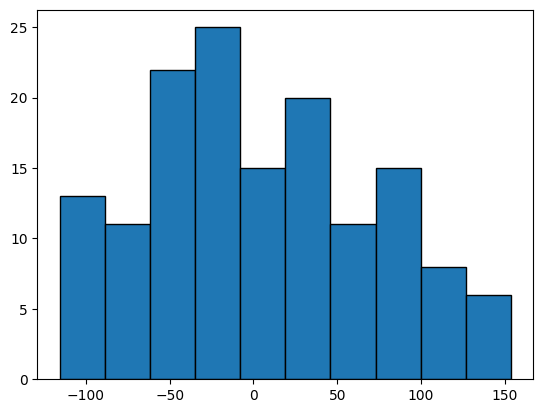

In [22]:
plt.hist(error1, bins=10, edgecolor='black')

Display the results in a plot

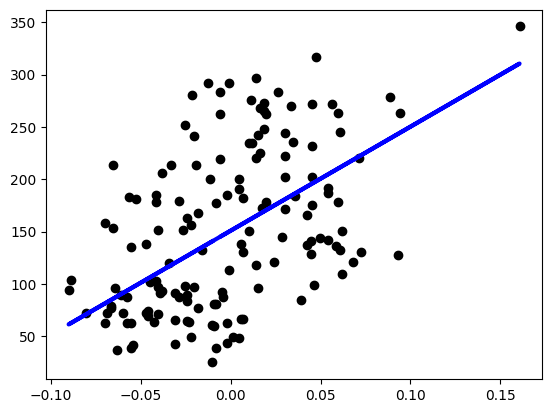

In [23]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

- TAREA:

Calcular métricas de desempeño del modelo: MSE, RMSE, MAE, r2, entre otros.

In [29]:
#MSE (mean square error)

def get_mean_square_error(y_real, y_pred):
    mse = (y_real - y_pred)**2
    return mse

In [28]:
#MAE (mean absolute error)

def get_mean_absolute_error(y_real, y_pred):
    mae = abs(y_real - y_pred)
    return mae

In [30]:
mse = get_mean_square_error(y_test,y_pred)


In [32]:
# RMSE (Root mean square error)

rmse = (sum(mse)/len(mse))**(0.5)
rmse

67.44223092379018

In [27]:
get_mean_absolute_error(y_test, y_pred)

array([115.51688772,  34.33551626,  56.03044064,  62.68643405,
         5.45922041, 100.74580131,  33.8458552 , 102.17288112,
        58.93384235,  78.60681644,  63.68297845,  61.65587259,
        50.56442985,  27.54399357,  40.08980791,  27.24752911,
         3.16942552,  41.55606032,  67.02722667,   9.83724405,
        61.17288112, 114.09326351,  93.28991569,  26.92201722,
        20.84239961,  74.20514253,  35.92717277, 104.7135399 ,
        74.16275595,  39.57109943,  30.45922041,  17.68643405,
        18.5592743 ,  12.68643405, 110.10854423, 141.85768034,
        75.49839301,  82.0390518 ,  36.22363723,  56.59820528,
        34.01861551,   9.15760039, 118.73052059,  24.37123326,
        47.11521381,  32.62555276, 107.48978186,  54.88478619,
        82.1933174 ,  53.74064576,  76.30519642,  35.86950547,
        36.38651399,  27.52549887,  72.02377107,   7.9032809 ,
        91.86780551, 103.65587259,  29.19653138,  62.84239961,
        56.66448374,  20.64059187,  98.19998697,  39.40

In [54]:
# r2 The coefficient of determination

r2 = 1-(sum((y_test - sum(y_test)/len(y_test))**2))/(sum((y_test - y_pred)**2))
r2

r3 = metrics.r2_score(y_test, y_pred)
r3

0.22336240546106712